In [116]:
import pandas as pd

data_path = "../Labb_Linear_regression/"

data = pd.read_csv(data_path+"Small-diameter-flow.csv", index_col=0)
data.head()

,Flow,Kinematic,Geometric,Inertial,Observer
0,-17.047687,-0.584344,-6.896327,-14.323560,0.0
1,-17.043179,-0.584344,-6.896327,-14.323560,0.0
2,-17.043179,-0.584344,-6.896327,-14.323560,0.0
3,-11.182193,1.242506,-5.069476,-11.583284,0.0
4,-11.184430,1.242506,-5.069476,-11.583284,0.0


In [117]:
import numpy as np

# Y is a responce variable
Y = flow = data['Flow']

# Antag att regression av 'TV' på 'sales' är ungefär linjär
# Y ≈ β0 + β1 X
# sales = β0 + β1 * 'TV'
# Modellspecifikationsmatrisen (designmatrisen) behöver en 1:a i första kolumnen 

X = np.column_stack([np.ones(Y.shape[0]), data['Kinematic'], data['Geometric'], data['Inertial']])


X

array([[  1.        ,  -0.58434432,  -6.89632658, -14.32356028],
       [  1.        ,  -0.58434432,  -6.89632658, -14.32356028],
       [  1.        ,  -0.58434432,  -6.89632658, -14.32356028],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ],
       [  1.        ,  -0.58434432,  -6.45368247, -14.32356028],
       [  1.        ,  -0.58434432,  -6.45368247, -14.32356028],
       [  1.        ,  -0.58434432,  -6.45368247, -14.32356028],
       [  1.        ,   0.66268797,  -5.20665018, -12.45301184],
       [  1.        ,   0.66268797,  -5.20665018, -12.45301184],
       [  1.        ,   0.66268797,  -5.20665018, -12.45301184],
       [  1.        ,   0

In [118]:
# pseudo-invers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([-2.55979314,  0.86871519,  3.61041818, -0.75368772])

In [119]:
# d - number of features
d = len(b) - 1

# n - size of the sample
n = Y.shape[0]

SSE = np.sum(np.square(Y-(X @ b)))

var = SSE/(n-d-1)
S = np.sqrt(var)

Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n

SSR = Syy - SSE
#SSR = (n*np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))))/n

SSR


np.float64(423.9203080376149)

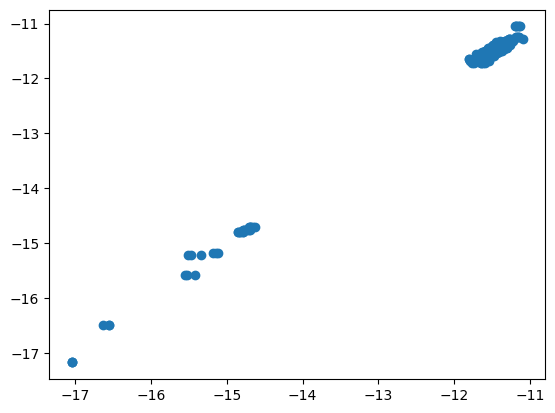

In [120]:
import matplotlib.pyplot as plt

plt.scatter(Y, X @ b)

In [ ]:
Rsq = SSR/Syy

Rsq

# Chose 90% as confidense level


np.float64(0.997121247321077)

In [ ]:
import scipy.stats as stats

# H0: all β = 0
sig_statistic = (SSR/d)/S
p_significance = stats.f.sf(sig_statistic, d, n-d-1)

p_significance

# We reject null hypothesis, regresion is significant!

np.float64(7.99851099815816e-141)

In [ ]:
c = np.linalg.pinv(X.T@X)*var

#H0: b3 is irrelevant, β3 = 0
b3_statistic = b[3] / (S*np.sqrt(c[3,3]))
p_b3 = 2*min(stats.t.cdf(b3_statistic, n-d-1), stats.t.sf(b3_statistic, n-d-1))

p_b3

np.float64(1.9192831125684836e-242)